# Titanic Dataset EDA

Este cuaderno es un ejemplo de análisis exploratorio de datos (EDA por sus siglas en inglés) ejecutado sobre el dataset Titanic donde se recogen datos de los pasajeros del Titanic frente a la variable de si sobrevivieron o no.

El ejercicio consiste en plotear gráficas interesantes buscando patrones interesantes que pudieran ser útiles en el futuro y tratando de desentrañar la historia que cuentan los datos.

---

## Línea de importación de librerías

In [1]:
# Librerías estándar de análisis de datos
import numpy as np
import pandas as pd

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

## Exploración básica del dataset

### Estas son las variables por entrada que contiene este dataset

* __PassengerId__ = Passenger identificator number
* __Pclass__ = Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* __survival__ = Survival (0 = No; 1 = Yes)
* __name__ = Name
* __sex__ = Sex
* __age__ = Age
* __sibsp__ = Number of Siblings/Spouses Aboard
* __parch__ = Number of Parents/Children Aboard
* __ticket__ = Ticket Number
* __fare__ = Passenger Fare (British pound)
* __cabin__ = Cabin
* __embarked__ = Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [2]:
# Una variable para la ruta, buenas prácticas
path_to_data = "./titanic_dataset.csv"

# Importamos el dataset y comprobamos que está correcto
df = pd.read_csv(path_to_data, index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Información sobre el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Se ha perdido la edad para bastantes de los casos. Faltan muchísimos datos en la columna cabin, y unos pocos en embarked. En el futuro habrá que lidiar con ello. De momento podemos contar los valores que faltan:

In [4]:
df.isnull().sum(axis = 0)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Solo faltan dos embarked. En edad faltan unos cuantos más, 177. El mayor problema con esto es cabon, donde nos faltan 687

In [5]:
# Análisis estadístico básico
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Una variable puede ser de dos tipos:
* __Categórica__: Es una variable que puede tomar un valor de un conjunto de valores limitados, asociados a una cualidad del dato y sin un orden lógico. Estas a su vez pueden ser:
    - __Binarias__: Pueden tomar uno de dos valores. Se suelen denominar clase positiva y clase negativa. Suelen representarse como Verdadero o Falso, y como 0 o 1, pese a lo cual no deben ser confundidas con variables numéricas
    - __Politómicas__: Pueden tomar más de dos valores.   
* __Numérica__: Son aquellas que vienen representadas por un número, que dependen de un orden lógico y con las que se pueden hacer operaciones aritméticas. A su vez, pueden ser de dos tipos:
    - __Continuas__: Entre dos valores dados, podemos encontrar infinitos valores
    - __Discretas__: Cuando entre dos valores dados, no puede tomar valores intermedios

In [6]:
categoricas = ["Survived", "Sex", "Embarked", "Pclass"]
numericas = ["Age", "Fare", "SibSp", "Parch"]

In [7]:
df[numericas].describe()

,Age,Fare,SibSp,Parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,14.526497,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


In [8]:
for col in categoricas:
    print(f"Column name: {col}")
    print(df[col].value_counts())
    print()

Column name: Survived
0    549
1    342
Name: Survived, dtype: int64

Column name: Sex
male      577
female    314
Name: Sex, dtype: int64

Column name: Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64

Column name: Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64



## Gráficos interesantes

### Barplots

Con el siguiente gráfico categórico de barras podemos ver la relación entre los valores de la variable categórica sex discriminadas por la variable survived.

El resultado es una comparación por sexos de los pasajeros que sobrevivieron y los que murieron. Podemos concluir dos cosas:
* En el Titanic viajaban más hombres que mujeres
* Murieron en proporción muchísimos más hombres que mujeres

¿Alguna hipótesis de por qué?

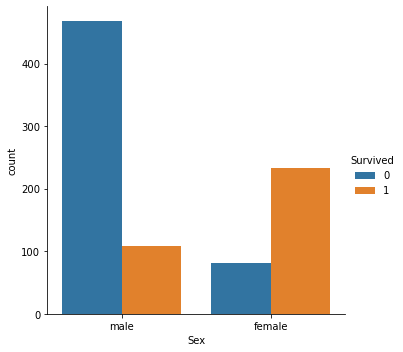

In [9]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = df)

Lo mismo que lo anterior, pero comprobando las ciudades de embarque. Dos cosas interesantes:
* La mayoría aplastante de gente embarcó en Southampton. ¿Para qué podríamos usar esto?
* Aunque no tan acentuado como en el caso de los sexos, se ve claro que a mayor clase, más probabilidad de sobrevivir

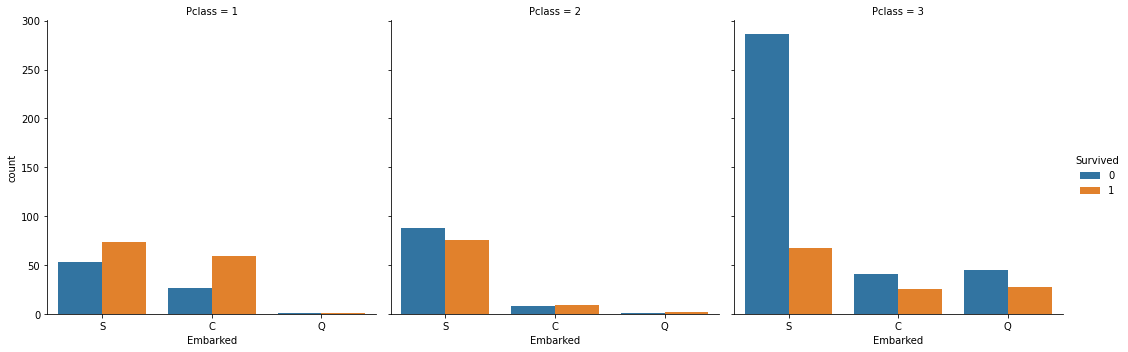

In [10]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = df)

### ViolinPlot

Un gráfico de violines nos permite visualizar una variable categórica (en este caso, sex) frente a una continua (age) y en este caso discriminar los resultados por survived. Cosas interesantes:
* Murieron muchos hombres y mujeres jóvenes
* Se salvaron sobre todo personas de mediana edad
* Murieron más niñas de las que se salvaron, pero se salvaron más ancianas de las que murieron
* Se salvaron muchísimos más niños en proporción a los que murieron. Sin embargo murieron más ancianos de los que se salvaron, aunque había pocos en general

<AxesSubplot:xlabel='Sex', ylabel='Age'>

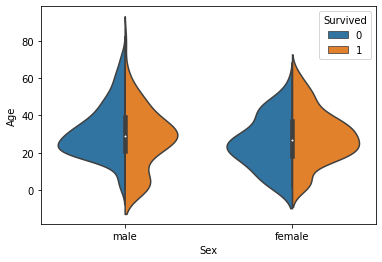

In [11]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = df, split = True)

### Scatterplots

Un scatter plot nos puede mostrar la relación entre variables numéricas y también la presencia de outliers.

Por ejemplo, aquí podemos ver la edad frente al precio del billete, a ver si las personas mas mayores pagan más, y discriminados por clases:

* No Hay una correlación lineal entre la edad y el precio
* Por algún motivo, un par de personas de primera pagaron notablemente más que el resto (outliers)
* Hay mucha más varianza en el precio para primera clase, podría estudiarse por separado
* El precio entre segunda y tercera es bastante similar

Al desglosar comprobamos la hipótesis. Además podemos ver que los precios, especialmente de segunda y tercera, van por tramos

<AxesSubplot:xlabel='Age', ylabel='Fare'>

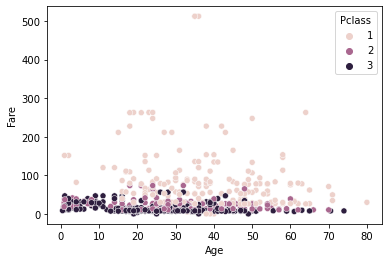

In [12]:
sns.scatterplot(data=df, x="Age", y="Fare", hue="Pclass")

<AxesSubplot:xlabel='Age', ylabel='Fare'>

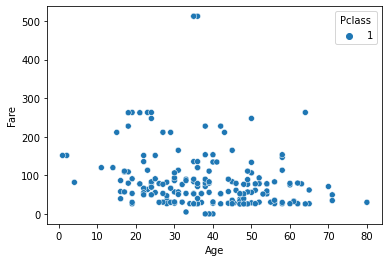

In [13]:
sns.scatterplot(data=df[df["Pclass"]==1], x="Age", y="Fare", hue="Pclass")

<AxesSubplot:xlabel='Age', ylabel='Fare'>

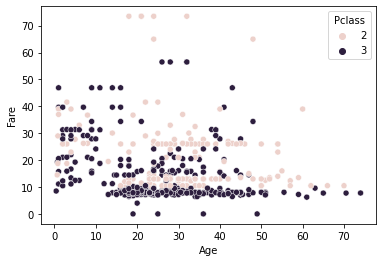

In [14]:
sns.scatterplot(data=df[df["Pclass"]!=1], x="Age", y="Fare", hue="Pclass")

Este método nos puede venir genial para ver de un vistazo posibles correlaciones entre las variables numéricas de un conjunto de datos. En este caso no parece ser interesante, pero eso solo lo sabemos porque lo hemos visto

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Fare'>,
        <AxesSubplot:xlabel='Parch', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Age', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Fare', ylabel='SibSp'>,
        <AxesSubplot:xlabel='SibSp', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Parch', ylabel='SibSp'>],
       [<AxesSubplot:xlabel='Age', ylabel='Parch'>,
        <AxesSubplot:xlabel='Fare', ylabel='Parch'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Parch'>,
        <AxesSubplot:xlabel='Parch', ylabel='Parch'>]], dtype=object)

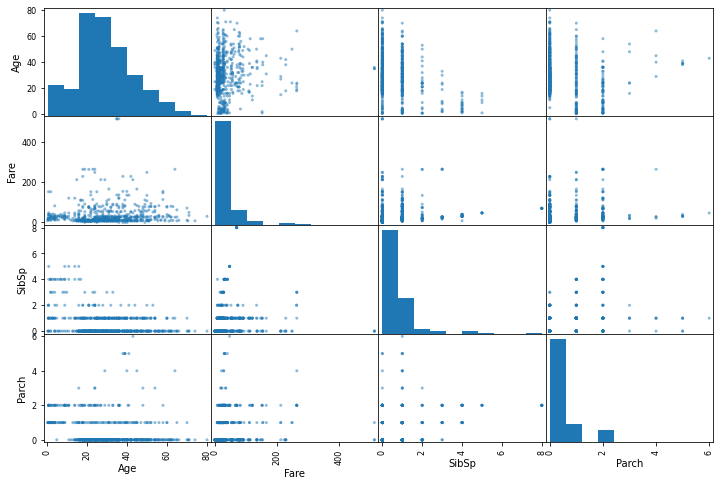

In [15]:
pd.plotting.scatter_matrix(df[numericas], figsize=(12,8))

### Heatmaps

Vamos a ver un par de ejemplos de mapas de calor, muy muy útiles para ver correlaciones entre las variables. También podemos mostrar otro tipo de relaciones de manera visual.

In [16]:
# El método .corr() nos muestra una tabla de correlaciones en el dataset para las variables continuas
# La diagonal siempre es 1 porque cada variable correlaciona en 1 consigo misma, evidentemente
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

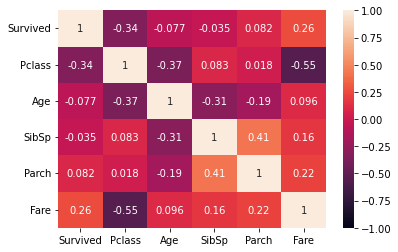

In [17]:
# A partir de la tabla de correlación, obtenemos el mapa de calor 
sns.heatmap(df.corr(), vmin=-1., vmax=1., annot=True)

<AxesSubplot:>

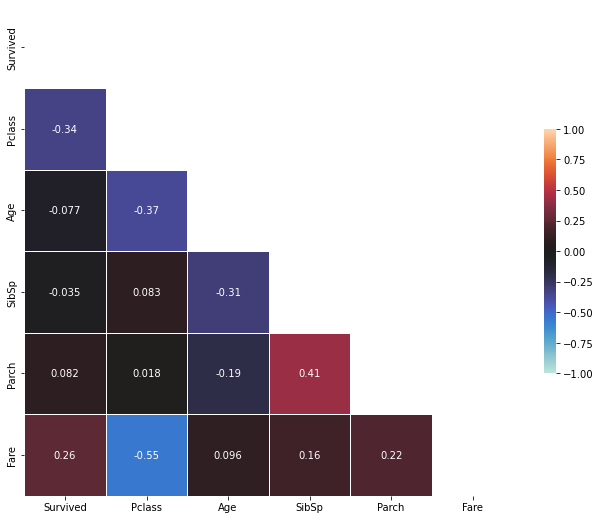

In [18]:
# Ahora igual pero más bonito

# Generamos una máscara para no duplicar lops valores
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Configuramos el matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Ploteamos el heatmap
sns.heatmap(df.corr(), mask=mask, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

<AxesSubplot:>

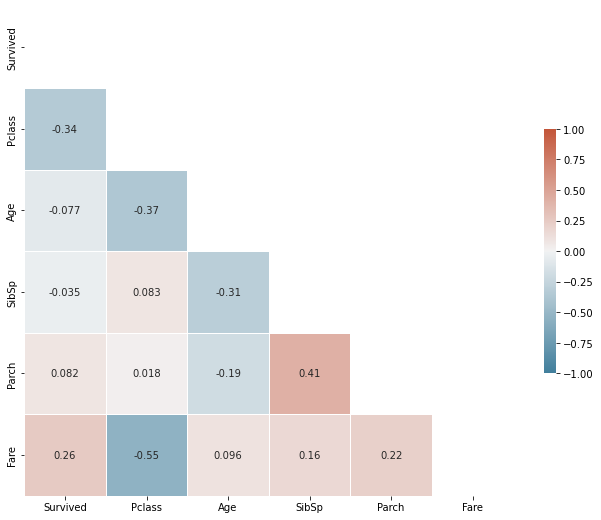

In [19]:
# Ahora igual pero otros colores
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Este último nos muestra la relación entre la supervivencia y la clase, aunque es menos interesante que el de correlacion.

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

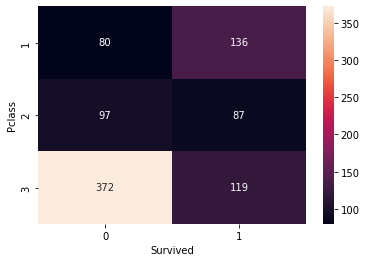

In [20]:
# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

Por último decir que esto también es un recurso imprescindible para leer matrices de confusión, que veremos más adelante.

### Histograms

Gráfico fundamental para estudiar las distribuciones de las variables numéricas. La distribución es importante porque nos ayuda a detectar outliers. También, los modelos se benefician mucho de recibir los datos escalados y normalizados.

Un gráfico normalizado es aquel que sigue una distribución gaussiana, con la media en 0 y la desviación típica en 1

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

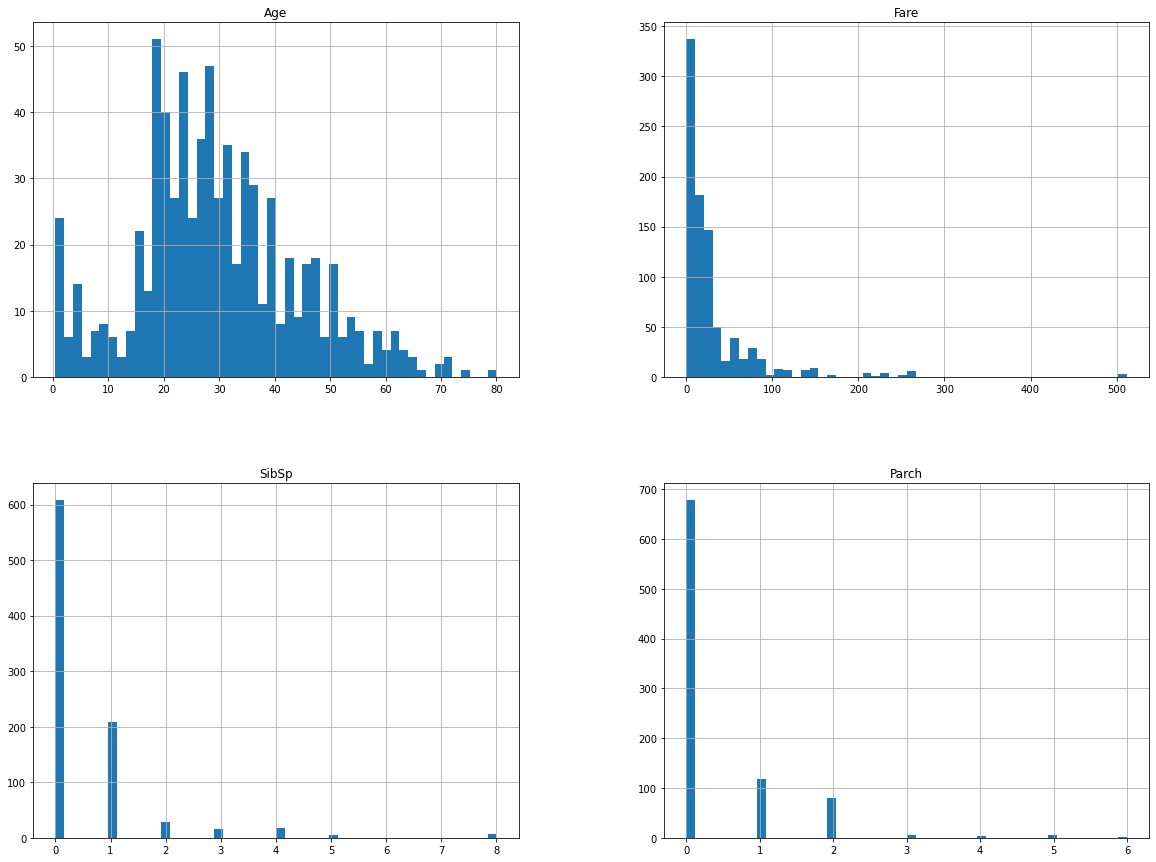

In [21]:
df[numericas].hist(bins=50, figsize=(20,15))

<AxesSubplot:xlabel='Age', ylabel='Count'>

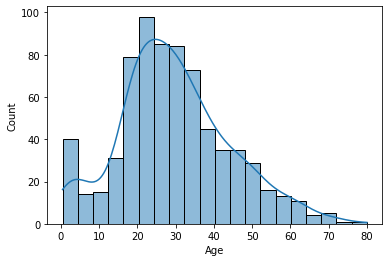

In [22]:
sns.histplot(data=df, x="Age", kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

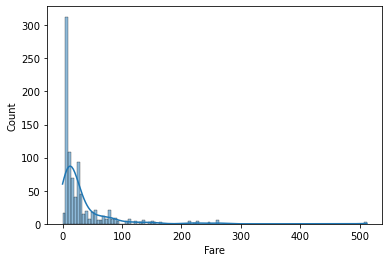

In [23]:
sns.histplot(data=df, x="Fare", kde=True)

Del primer gráfico podemos ver que quizá lo único interesante para representar en forma de histograma es la edad y el precio del billete. 

Con la distribución de edades podemos ver __mas o menos__ una distribución gaussiana, con algo de cola hacia la derecha. Cabe remarcar que hay un pico de edad en los 0 años, parece que embarcaron muchos bebés. 

En el caso del precio del billete, vemos que la cola es mucho más grave. Esto remarca el problema de los outliers. Si nos fijamos, aunque se ve pequeño, el problema son esos pasajeros que pagaron mas de 500. Vamos a ver la distribución sin ellos

<AxesSubplot:xlabel='Fare', ylabel='Count'>

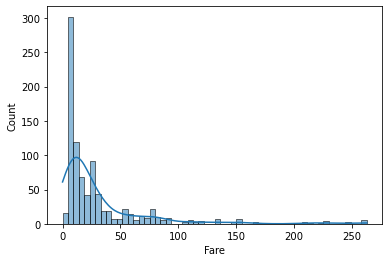

In [24]:
sns.histplot(data=df[df["Fare"]<500], x="Fare", kde=True)

Algo mejor, pero sigue habiendo muchísima cola a la derecha. Debido a la alta presencia de outliers, probablemente fuera necesario prescindir de esta variable o encontrar alguna manera de transformarla en algo útil. Eso es cosa de la ingeniería de características, no es nuestro scope ahora mismo. Aunque vamos a hacer un intento rápido con .cut()

In [25]:
df["Cut_fare"] = pd.cut(df[df["Fare"]<500]["Fare"], bins=5, labels = ["Very_cheap", "Cheap", "Regular", "Expensive", "Very_expensive"])

In [26]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cut_fare
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Very_cheap
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cheap
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Very_cheap
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Cheap
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Very_cheap


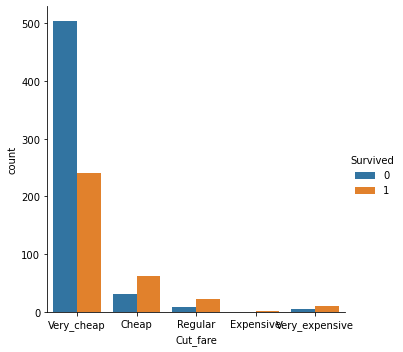

In [27]:
sns.catplot(x="Cut_fare", kind ="count", data=df, hue="Survived")

Aún así se debe coger esto con pinzas. Es posible que esto correlacione con la clase en la que viajan y eso es un problema.

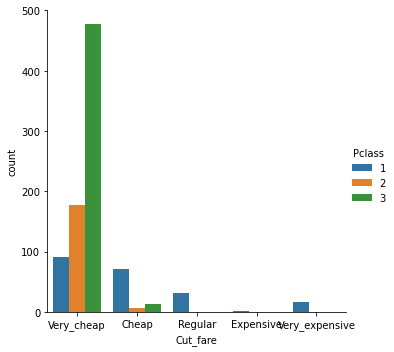

In [28]:
sns.catplot(x="Cut_fare", kind ="count", data=df, hue="Pclass")

Para mi sorpresa, hay gente de primera y segunda que pagó poco. Aún así abogaría por ajustar los valores del cut, aunque es prometedor esto.

### Pieplot

Por lo general no se usan, porque son muy engañosos, pero os enseño un ejemplo:

([<matplotlib.patches.Wedge at 0x1d57b04ee90>,
 [Text(-0.17571616709359641, 1.0858746836637898, ''),
  Text(-0.5160762002061153, -0.9714243951954356, ''),
  Text(0.8765111456658484, -0.6646263698677192, '')])

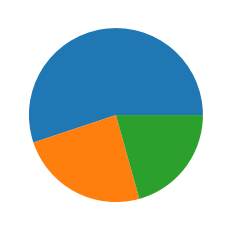

In [29]:
plt.pie(df["Pclass"].value_counts())

# Ingeniería de características

Vamos a referirnos por ingeniería de características a todo lo que tenga que ver con transformaciones en el dataset, ya sea modificando, eliminando o añadiendo características.

Aunque lo esté separando del EDA, es habitual intercalarlo, y algo así haremos considerando que para comprobar que una transformación es correcta, o que los gráficos cambian como necesitamos

Además, aunque dé algunas directrices, las transformaciones van a depender de cada conjunto de datos, a pesar de las cosas comunes.

### Selección de variables 1.

__No__ todas las columnas de nuestro dataset van a ser siempre __variables__. Las variables van a ser aquellas características, numéricas o cualitativas, que pueden ser medidas o contadas y que tienen algún impacto en nuestra salida. El índice del dataset __NO__ es una variable. El ticket tampoco lo es. El nombre tampoco, no tiene ningún impacto en la esperanza de supervivencia. La gran mayoría de veces esto se ve a simple vista, tenemos que prescindir de ellas

Volveremos a repetir este paso más adelante tantas veces como sea necesario, ya que veremos (quizá no en este dataset, pero si en otros) que a veces tenemos variables que es mejor descartar por poco impacto o por otros motivos.

In [30]:
df.drop(["Name", "Ticket"], axis=1, inplace=True)

In [31]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Cut_fare'],
      dtype='object')

En casos de aprendizaje supervisado, tenemos que separar nuestra variable objetivo (target, y, variable dependiente), de las variables independientes. Cuando entrenemos el modelo, esto servirá para diferenciar, a la hora de entrenar el modelo, qué variable tiene que predecir, y con qué variables puede hacerlo. Por lo general, las variables independientes forman una matriz (y por tanto se expresan con __X mayúscula__ y la variable dependiente forma un vecto, y por tanto __y minúscula__)

In [32]:
y = df["Survived"]
X = df.drop("Survived", axis=1)

In [33]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [34]:
y.shape

(891,)

In [35]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cut_fare
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,7.2500,NaN,S,Very_cheap
2,1,female,38.0,1,0,71.2833,C85,C,Cheap
3,3,female,26.0,0,0,7.9250,NaN,S,Very_cheap
4,1,female,35.0,1,0,53.1000,C123,S,Cheap
5,3,male,35.0,0,0,8.0500,NaN,S,Very_cheap


In [36]:
X.shape

(891, 9)

Para que veáis el tema vector-matriz:

In [37]:
y.to_numpy()

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [38]:
X.to_numpy()

array([[3, 'male', 22.0, ..., nan, 'S', 'Very_cheap'],
       [1, 'female', 38.0, ..., 'C85', 'C', 'Cheap'],
       [3, 'female', 26.0, ..., nan, 'S', 'Very_cheap'],
       ...,
       [3, 'female', nan, ..., nan, 'S', 'Very_cheap'],
       [1, 'male', 26.0, ..., 'C148', 'C', 'Very_cheap'],
       [3, 'male', 32.0, ..., nan, 'Q', 'Very_cheap']], dtype=object)

En sí mismos son conceptos matemáticos compejos. No vamos a ahondar en la profundidad así que os lo defino de manera __MUY__ superficial, lo justo y necesario para poder apañarnos con ello (profundizar queda a vuestra discrección si lo consideráis necesario)

Podemos dejarlo en que son representaciones de datos en espacios matemáticos que pueden ser multidimensionales. Como podéis observar, la diferencia es que nuestro vector __y__ solo tiene una dimensión (lo vemos en el y.shape) con 891 valores, mientras que la matriz tiene dos dimensiones (una dimensión representa nuestras filas y la otra las columnas). En ambos casos, los valores no son independientes, sino que cada valor tiene un impacto en todo el objeto matemático que es la matriz o el vector. La posición es importante, y modificar un valor modifica todo el objeto.

El campo de las matemáticas que trata estos conceptos es el álgebra lineal, que es justamente hacia lo que se orienta numpy. No es necesario que nosotros seamos matemáticos y sepamos los pormenores de los cálculos que vamos (aunque es recomendable, evidentemente), pero si que tenemos que entender el concepto de las cosas que veamos. 

Por el momento, ya tenemos los datos preparados para empezar a transformar